## Classify Handwrite Digits
### 1. Import Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 2. Import Dataset using MNIST Data

In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### 3. View Data

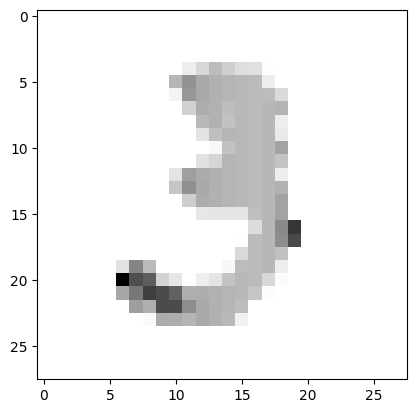

np.uint8(3)

In [10]:
def drawn(n):
    plt.imshow(n, cmap=plt.cm.binary)
    plt.show()

drawn(X_train[10])
y_train[10]

### 4. Make Nueral Network and Train

In [12]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=3)

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9219 - loss: 0.2668
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.1093
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0749


### 5. Check Accuracy and Loss

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f'Loss: {val_loss} | Accuracy: {val_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9710 - loss: 0.0884
Loss: 0.08841368556022644 | Accuracy: 0.9710000157356262


### 6. Prediction using Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Label: 1
Prediction: 1


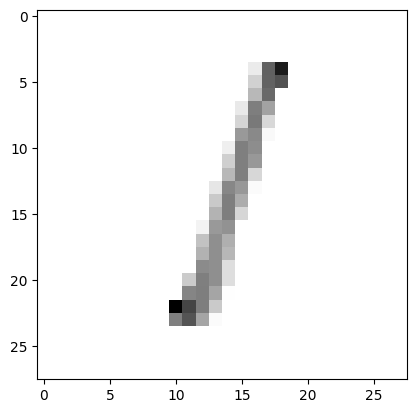

In [15]:
predictions  = model.predict([X_test])
print(f'Label: {y_test[2]}')
print(f'Prediction: {np.argmax(predictions[2])}')

drawn(X_test[2])

#### Save Model

In [18]:
model.save('model.keras')

#### Load Model